In [37]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

In [38]:
sns.set_context("notebook")
sns.set_style("dark")

In [39]:
use_example = False
if use_example:
    with open("example-real-data.json", "rb") as f:
        old_raw_data = json.load(f)
else:
    old_raw_data = {"data": []}
    files = os.listdir("./data/")
    for file in files:
        if file.endswith(".json"):
            with open(f"data/{file}", "r") as f:
                match_data = json.load(f)
                old_raw_data["data"] += match_data["data"]

In [40]:
len(old_raw_data["data"])

25838

## Loading raw data from analytics system

In [41]:
raw_data = []

for el in old_raw_data["data"]:
    # Value
    if "value" in el:
        el["value"] = float(el["value"])

    # Classes
    if "il" in el and "if" in el:
        el["i-faction-class"] = el["if"] + "-" + el["il"]
    if "tl" in el and "tf" in el:
        el["t-faction-class"] = el["tf"] + "-" + el["tl"]

    # Instigator coords
    if "ic" in el:
        el["ic_x"] = float(el["ic"].split(" ")[0].split("=")[1])
    if "ic" in el:
        el["ic_y"] = float(el["ic"].split(" ")[1].split("=")[1])

    # Target coords
    if "tc" in el:
        el["tc_x"] = float(el["tc"].split(" ")[0].split("=")[1])
    if "tc" in el:
        el["tc_y"] = float(el["tc"].split(" ")[1].split("=")[1])

    raw_data.append(el)

## Analyzing damage (per pawn, per class)

In [42]:
damage_df = pd.DataFrame([el for el in raw_data if el["Type"] == "Damage"])

In [43]:
damage_df.head()

,value,i,t,ips,tps,il,tl,if,tf,ic,tc,Type,i-faction-class,t-faction-class,ic_x,ic_y,tc_x,tc_y
0,15.000000,CH_2147298354,CH_2147299959,PS_2147451513,PS_2147476510,MelS,MelS,LSM,CSM,X=4756.736 Y=-11375.842 Z=-338.260,X=6564.843 Y=-13317.048 Z=287.102,Damage,LSM-MelS,CSM-MelS,4756.736,-11375.842,6564.843,-13317.048
1,15.000000,CH_2147298354,CH_2147299959,PS_2147451513,PS_2147476510,MelS,MelS,LSM,CSM,X=4761.684 Y=-11146.692 Z=-361.951,X=6216.694 Y=-13053.242 Z=232.571,Damage,LSM-MelS,CSM-MelS,4761.684,-11146.692,6216.694,-13053.242
2,15.000000,CH_2147298354,CH_2147299959,PS_2147451513,PS_2147476510,MelS,MelS,LSM,CSM,X=4618.393 Y=-10947.164 Z=-392.781,X=5943.171 Y=-12736.564 Z=107.742,Damage,LSM-MelS,CSM-MelS,4618.393,-10947.164,5943.171,-12736.564
3,20.742249,CH_2147298354,CH_2147299959,PS_2147451513,PS_2147476510,MelS,MelS,LSM,CSM,X=4611.332 Y=-10937.122 Z=-394.447,X=5636.104 Y=-11770.576 Z=-218.947,Damage,LSM-MelS,CSM-MelS,4611.332,-10937.122,5636.104,-11770.576
4,30.000000,CH_2147298023,CH_2147299959,PS_2147480996,PS_2147476510,TacS,MelS,LSM,CSM,X=4294.929 Y=-11244.208 Z=-363.980,X=5578.625 Y=-11682.660 Z=-242.010,Damage,LSM-TacS,CSM-MelS,4294.929,-11244.208,5578.625,-11682.660


In [44]:
# damage_df["value"] = pd.to_numeric(damage_df["value"])
damage_per_pawn = damage_df.groupby(["i"]).agg(
    damage_per_life=('value', 'sum'),
    loadout=('i-faction-class', 'first')
)
damage_per_pawn.head()

,damage_per_life,loadout
i,,
CH_2146700396,410.000000,CSM-MelV
CH_2146703781,92.000000,CSM-MelS
CH_2146704149,367.599994,LSM-TacVG
CH_2146704647,1343.498813,CSM-TacS
CH_2146705165,188.000000,LSM-JpaVA


In [95]:
damage_per_life_for_classes = damage_per_pawn.sort_values(by='loadout').groupby("loadout").agg(
    mean_damage_per_life=('damage_per_life', 'mean'),
    std_damage_per_life=('damage_per_life', 'std')
)
damage_per_life_for_classes

,mean_damage_per_life,std_damage_per_life
loadout,,
CSM-AucV,1188.287284,1132.379019
CSM-HboS,827.548754,746.078781
CSM-JpaS,402.104883,265.349577
CSM-JpaVA,1122.124417,1318.264460
CSM-MelS,539.994814,586.157893
CSM-MelV,452.792379,294.155236
CSM-PcaS,892.062836,761.090814
CSM-SupS,277.857143,235.508242
CSM-TacS,553.582152,745.166714


<Axes: title={'center': 'damage_per_life'}, ylabel='[loadout]'>

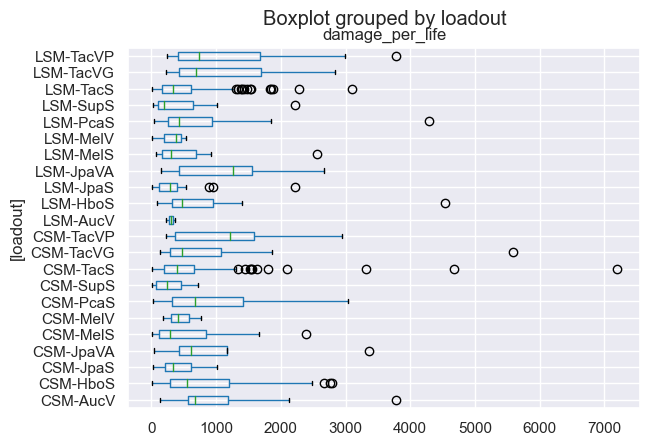

In [71]:
damage_per_pawn.sort_values(by='loadout').boxplot(by="loadout", vert=False)
# sns.violinplot(damage_per_pawn, x="damage_per_life", y="loadout")

## Analyzing XP (per pawn, per class and action)

In [72]:
xp_df = pd.DataFrame([el for el in raw_data if el["Type"] == "XP"])
xp_df.head()

,t,value,tps,tf,tl,tc,action,Type,t-faction-class,tc_x,tc_y
0,CH_2147298023,-15.0,PS_2147480996,LSM,TacS,X=4138.131 Y=-11216.999 Z=-355.835,Friendly fire,XP,LSM-TacS,4138.131,-11216.999
1,CH_2147298023,-8.0,PS_2147480996,LSM,TacS,X=4376.996 Y=-11282.090 Z=-354.907,Friendly fire,XP,LSM-TacS,4376.996,-11282.090
2,CH_2147298023,-8.0,PS_2147480996,LSM,TacS,X=4614.307 Y=-11435.213 Z=-337.219,Friendly fire,XP,LSM-TacS,4614.307,-11435.213
3,CH_2147298023,-8.0,PS_2147480996,LSM,TacS,X=4614.654 Y=-11436.802 Z=-337.044,Friendly fire,XP,LSM-TacS,4614.654,-11436.802
4,CH_2147298354,50.0,PS_2147451513,LSM,MelS,X=4923.494 Y=-11255.877 Z=-338.951,Assist,XP,LSM-MelS,4923.494,-11255.877


In [73]:
xp_per_pawn = xp_df.groupby(["t", "action"]).agg(
    xp_per_life=('value', 'sum'),
    loadout=('t-faction-class', 'first')
)

In [74]:
xp_per_pawn.head()

xp_per_life    loadout
t             action                                
CH_2146700396 Assist                 50.0   CSM-MelV
              Elite down            200.0   CSM-MelV
              Enemy finished         50.0   CSM-MelV
CH_2146704149 Enemy down            100.0  LSM-TacVG
CH_2146704647 Elite down            600.0   CSM-TacS

In [75]:
xp_per_life_for_class_and_action = xp_per_pawn.groupby(["loadout", "action"]).agg(
    mean_xp_per_life=('xp_per_life', 'mean'),
    std_xp_per_life=('xp_per_life', 'std')
)
xp_per_life_for_class_and_action.head()

mean_xp_per_life  std_xp_per_life
loadout  action                                            
CSM-AucV Ally revived                150.0              NaN
         Assist                      100.0        40.824829
         Capture stopped             700.0       600.000000
         Elite down                  200.0              NaN
         Elite executed              300.0              NaN

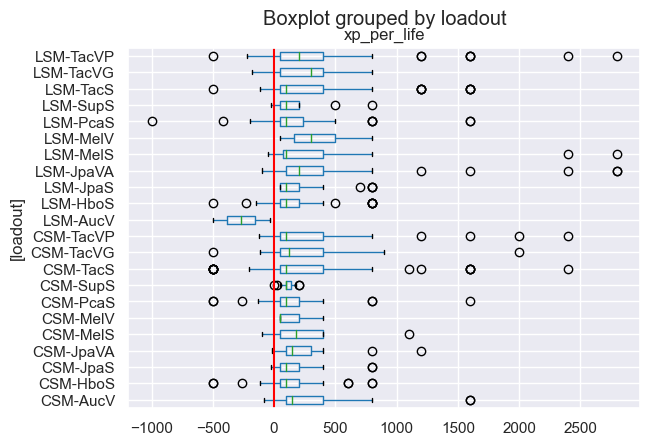

In [77]:
xp_per_pawn.sort_values(by='loadout').boxplot(by='loadout', vert=False)

plt.axvline(x=0, color='red')
plt.show()

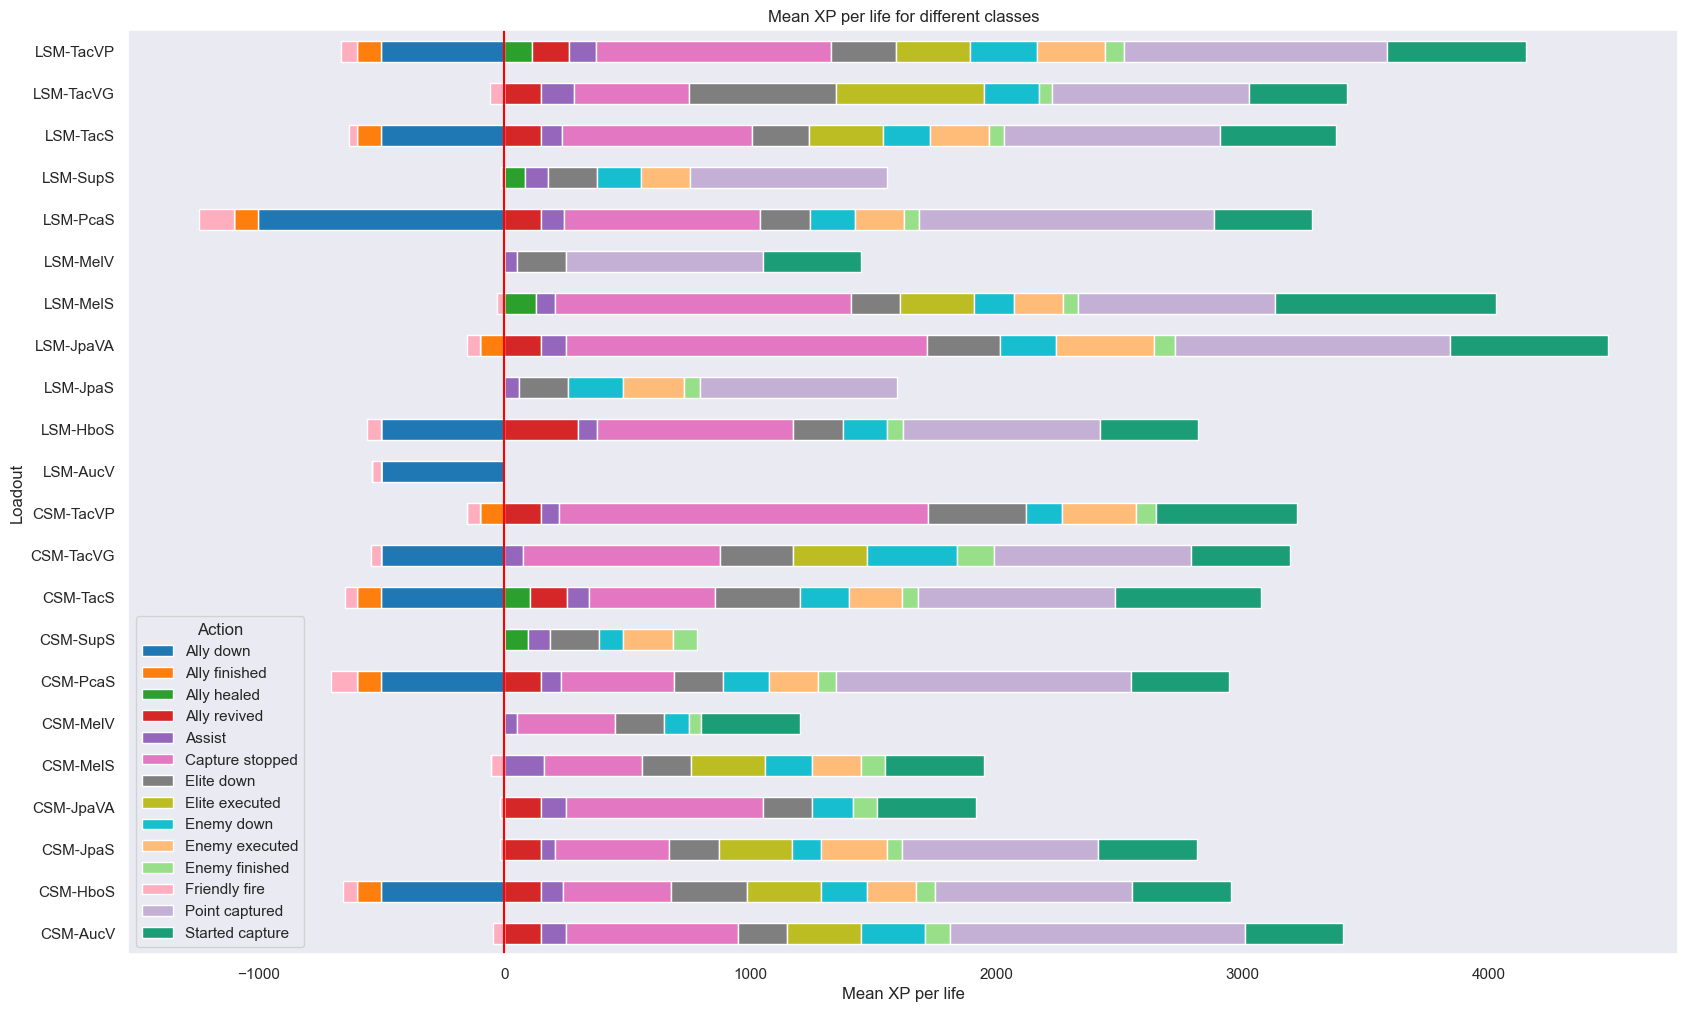

In [94]:
# Create a pivot table to reshape the data for plotting
pivot_xp_per_life_for_class_and_action = xp_per_life_for_class_and_action.reset_index()
pivot_xp_per_life_for_class_and_action = pivot_xp_per_life_for_class_and_action.pivot(index='loadout', columns='action', values='mean_xp_per_life')

# Define a custom color palette
custom_colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Yellow-Green
    '#17becf',  # Cyan
    '#ffbb78',  # Light Orange
    '#98df8a',  # Light Green
    '#ffaec0',  # Light Pink
    '#c5b0d5',  # Light Purple
    '#1b9e77',  # Dark Green
]

# Create a rotated stacked barplot with the custom color palette
ax = pivot_xp_per_life_for_class_and_action.plot(kind='barh', stacked=True, figsize=(20, 12), color=custom_colors)

# Customize the plot
plt.title('Mean XP per life for different classes')
plt.xlabel('Mean XP per life')
plt.ylabel('Loadout')
plt.legend(title='Action')

plt.axvline(x=0, color='red')

# Show the plot
plt.show()

## Analyzing KD ratios

In [80]:
kills_df = xp_df[xp_df["action"] == "Enemy down"]
kills_df.head()

,t,value,tps,tf,tl,tc,action,Type,t-faction-class,tc_x,tc_y
5,CH_2147298023,100.0,PS_2147480996,LSM,TacS,X=5075.189 Y=-11603.107 Z=-239.720,Enemy down,XP,LSM-TacS,5075.189,-11603.107
7,CH_2147299362,100.0,PS_2147478807,CSM,MelS,X=4580.340 Y=-6189.420 Z=574.910,Enemy down,XP,CSM-MelS,4580.340,-6189.420
11,CH_2147299362,100.0,PS_2147478807,CSM,MelS,X=4736.840 Y=-3964.140 Z=561.360,Enemy down,XP,CSM-MelS,4736.840,-3964.140
16,CH_2147299362,100.0,PS_2147478807,CSM,MelS,X=3769.990 Y=-4582.180 Z=555.990,Enemy down,XP,CSM-MelS,3769.990,-4582.180
18,CH_2147299362,100.0,PS_2147478807,CSM,MelS,X=3640.960 Y=-3521.410 Z=559.720,Enemy down,XP,CSM-MelS,3640.960,-3521.410


In [81]:
kills_per_pawn = kills_df.groupby(["t"]).agg(
    kill_count=('t', 'count'),
    loadout=('t-faction-class', 'first')
)
kills_per_pawn.head()

,kill_count,loadout
t,,
CH_2146704149,1,LSM-TacVG
CH_2146716980,3,LSM-TacS
CH_2146725717,1,CSM-TacS
CH_2146726584,3,CSM-HboS
CH_2146733385,2,LSM-TacVP


In [82]:
kills_per_life_for_classes = kills_per_pawn.groupby("loadout").agg(
    mean_kills_per_life=('kill_count', 'mean'),
    std_kills_per_life=('kill_count', 'std')
)
kills_per_life_for_classes.head()

,mean_kills_per_life,std_kills_per_life
loadout,,
CSM-AucV,2.600000,2.509980
CSM-HboS,1.884615,0.951921
CSM-JpaS,1.166667,0.389249
CSM-JpaVA,1.666667,1.154701
CSM-MelS,1.888889,0.927961


<Axes: title={'center': 'kill_count'}, ylabel='[loadout]'>

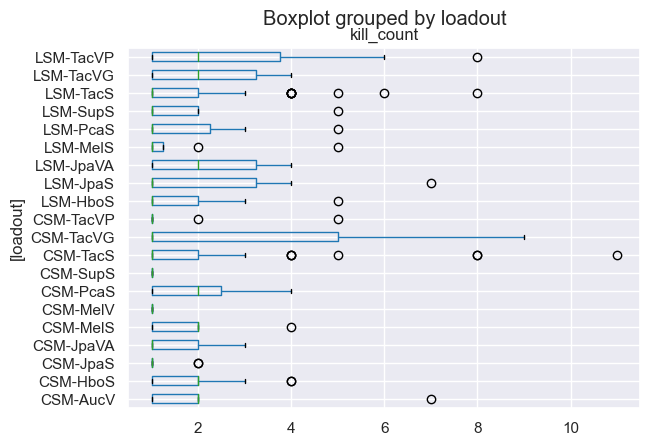

In [83]:
kills_per_pawn.sort_values(by='loadout').boxplot(by="loadout", vert=False)
# sns.violinplot(kills_per_pawn, x="kill_count", y="loadout")

## Analyzing class frequencies

In [84]:
spawn_df = pd.DataFrame([el for el in raw_data if el["Type"] == "Spawn"])

In [85]:
class_spawns = spawn_df["t-faction-class"].value_counts()

In [86]:
class_spawns.head()

t-faction-class
LSM-TacS     181
CSM-TacS     176
CSM-HboS      59
LSM-JpaS      38
LSM-TacVP     33
Name: count, dtype: int64

<Axes: title={'center': 'Classes spawn frequency'}, ylabel='t-faction-class'>

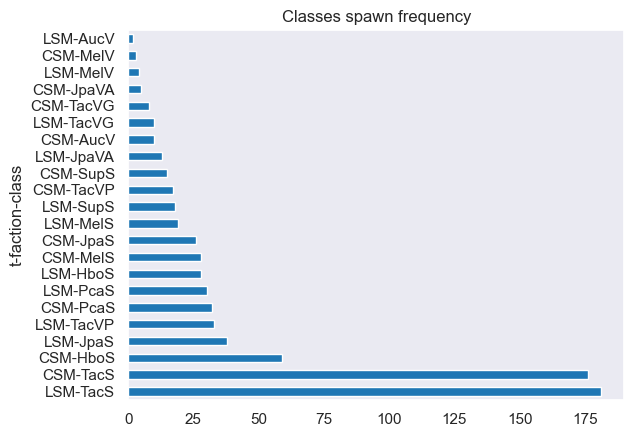

In [87]:
class_spawns.plot.barh(title="Classes spawn frequency")

## Heatmaps

### Damage dealers

In [68]:
x_points = list(damage_df["ic_x"])
y_points = list(damage_df["ic_y"])

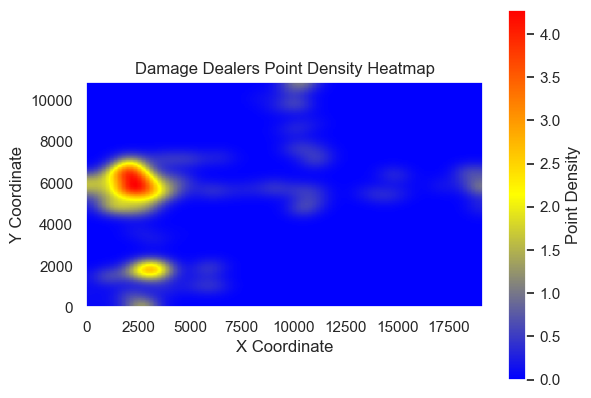

In [83]:
from matplotlib.colors import LinearSegmentedColormap

# Create a 2D histogram to represent point density
heatmap, xedges, yedges = np.histogram2d(x_points, y_points, bins=100)

# Smooth the heatmap using Gaussian convolution
from scipy.ndimage import gaussian_filter

heatmap = gaussian_filter(heatmap, sigma=3)

# Define a custom colormap (blue, yellow, red)
colors = [(0, 'blue'), (0.5, 'yellow'), (1, 'red')]
custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

# Create the heatmap plot
plt.imshow(heatmap.T, origin='lower', extent=[0, xedges.max(), 0, yedges.max()], cmap=custom_cmap)
plt.colorbar(label='Point Density')  # Add a colorbar for reference
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Damage Dealers Point Density Heatmap')

plt.show()